* Приведение объектов в один и тот же масштаб
    - нормализация, стандартизация
* Введение штрафа за сложность
    - регуляризация
* Понижение размерности
     1. Выбор признаков
         * Sequential Backward Selection
     2. Выделение признаков
         - principal component analysis

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)
df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
              'Alcalinity of ash', 'Magnesium', 'Total phenols',
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
              'Color intensity', 'Hue', 'Diluted wines',
              'Proline']

In [45]:
from sklearn.model_selection import train_test_split

X, y =  df.drop(['Class label'], axis=1), df[['Class label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42, stratify=y)

# Нормализация MinMaxScaled 
- возращает значения в промежутке, `default: [0, 1]`
## $ x_{i}= \frac{x_i - x_{min}}{x_{max} - x_{min}}$

In [46]:
X = X_train
X_train_norm = (X - X.min()) / (X.max() - X.min())

In [47]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm  = mms.transform(X_test)

# Стандартизация с z-преобразование
- центрируем относительно 0 со стандартным отклонением 1, результат в виде снормального распределения`
## $ z = {\displaystyle {x-mean(x)  \over \sigma }}$

In [48]:
X = X_train
X_train_std = (X- X.mean())/X.std()

In [49]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# Регуляризация
-это метод, который препятствует усложнению модели. Он делает это, наказывая *функцию потери*

***Функция потерь*** - это сумма квадратов разности между фактическим значением и прогнозируемым значением

<img src='https://miro.medium.com/max/1400/1*ktraE58N3fMNMXtaC49CTw.png' width= '500'>
Когда мы штрафуем веса `θ3 и θ4` и делаем их слишком маленькими, очень близкими к нулю. Это делает эти веса незначительными и помогает упростить модель.
<img src='https://miro.medium.com/max/1396/1*9J2qVRdPCIe9YlQk9W2G6g.png' width= '500'>

λ находится между 0 и большим значением, нам нужно найти оптимальное значение 
<img src='https://miro.medium.com/max/1346/1*HP4RnnX-S3qyb4qrmI0MVQ.png' width= '500'>
через λ уменьшаем веса в сторону 0 и сокращаем завимимость модели от обучающих данных 

# L1-регуляризация
<img src='https://miro.medium.com/max/1262/1*6dfxa-smu8nRZwiFkSwriA.png' width=500>
<img src='https://user-images.githubusercontent.com/54672403/81103547-da70c780-8f19-11ea-8130-a5c3d07b52a1.png' width=500>

Есть массив факторов, отберём лишь небольшое количество важнейших, задающих тенденцию, и удалим все остальные, являющиеся просто шумом.<br> Это называется ***разрежением***, поскольку большинство факторов будет равно нулю, и лишь небольшое их число не будет равным нулю

- штрафует сумму абсолютных значений весов.
- имеет разреженное решение
- имеет несколько решений
- генерирует модели, которые просты и интерпретируемы, но не могут изучать сложные шаблоны

In [50]:
# Через C можно управлять эффектом регуляризации
# чем меньше C, тем меньше объектов выбрано
lr = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr', C=1)
lr.fit(X_train_std, y_train);

In [51]:
lr.score(X_train_std, y_train)

1.0

In [52]:
lr.score(X_test_std, y_test)

0.9814814814814815

### - можно получить весовые коэфиценты
lr.intercept_  = $w_0$<br>
lr.coef_  = $w_{j>0}$ 

In [53]:
lr.coef_.shape

(3, 13)

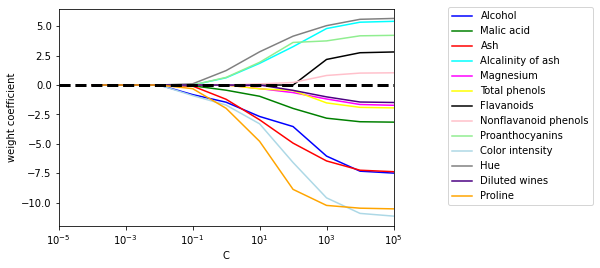

In [54]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr', C=10.**c, random_state=42)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True);

# L2-регуляризация

<img src='https://miro.medium.com/max/1240/1*6v8U-5NwcWrQ1mKiTfYz6Q.png' width=500>
<img src='https://user-images.githubusercontent.com/54672403/81103553-dcd32180-8f19-11ea-8abb-64e3ef36f78e.png' width=500>



- Регуляризация L2 штрафует сумму квадратов весов.
- имеет не разреженное решение
- имеет одно решение
- Регуляризация L2 способна изучать сложные шаблоны данных

In [55]:
lr = LogisticRegression(penalty='l2',C=1)
lr.fit(X_train_std, y_train);

In [56]:
lr.score(X_test_std, y_test)

0.9814814814814815

# Понижение размерности 

1. *Выбор признаков* <br> отбираем подмножество признаков  
2. *Выделение признаков* <br>создаём новые признаки из старых


# Sequential Backward Selection [SBS](http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/)
Алгоритм последовательного выбора объектов

Идея:
    * уменьшить количесво признаков
Алгоритм:
    * последовательно удалять признаки, пока подпространство не станет содержать желательное кол-во признаков
      функция, которую надо минимизировать, будет решать, какой признак надо удалить
        - удаление признака должно приводить к наименьшей потери эффективности
* другие алгоритмы [sklearn](https://scikit-learn.org/stable/modules/feature_selection.html)

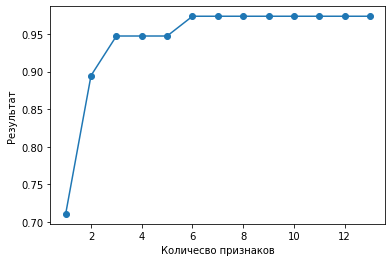

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from SequentialBackwardSelection  import SBS
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylabel('Результат')
plt.xlabel('Количесво признаков');

In [58]:
knn.fit(X_train_std, y_train)
knn.score(X_train_std, y_train), knn.score(X_test_std, y_test)

(0.9838709677419355, 0.9444444444444444)

In [59]:
new_param = list(sbs.subsets_[3])
knn.fit(X_train_std[:, new_param], y_train)
knn.score(X_train_std[:, new_param], y_train), knn.score(X_test_std[:, new_param], y_test)

(0.9758064516129032, 0.9444444444444444)

# Выделение признаков
сжатие данных с сохранением большей части значимой инфы
# principal component analysis [PCA](https://habr.com/en/post/304214/)

<img src='https://habrastorage.org/files/695/466/809/6954668091cf4bb1b64a3ee4629fd79a.png' width = '400'>

1. стандартизировать данные
2. построить Ковариационную матрицу
3. разложить Ковариационную матрицу на *вектора* и *значения*
4. Выбрать k *векторов*, соответствующих k наибольшим *значениям* $ k<<d$ <br> d - начальное кол-во признаков, вектора - столбцы
5. построить матрицы проекции **W** из k-векторов `dxk`
6. проецируем `dxk`-матрицу на `dxd`-матрицу
=> уменьшим размерность


In [60]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, 1:].values, df['Class label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [61]:
cov_mat = np.cov(X_train_std.T)

In [62]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

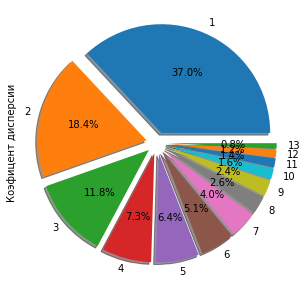

In [63]:
var_exp = [(i / sum(eigen_vals)) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = pd.DataFrame({'features':range(13), 'Коэфицент дисперсии' :  var_exp})
cum_var_exp.plot.pie(explode=[0.1]*13,labels = range(1,14),
                     y = 'Коэфицент дисперсии',autopct='%1.1f%%',
                     shadow=True,legend=False,figsize=(5, 5));

График показывает, что первые 2 значения объясняют 60% дисперсии в данных


In [64]:
eigen_pairs = [(eigen_vals[i], eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

### - матрица проекции из k векторов

In [65]:
vectors = [eigen_pairs[0][1], eigen_pairs[1][1]]
mask_matrix = pd.DataFrame(np.array(vectors).T, columns=['PC 1','PC 2'])

In [66]:
X_train_pca = X_train_std @ mask_matrix

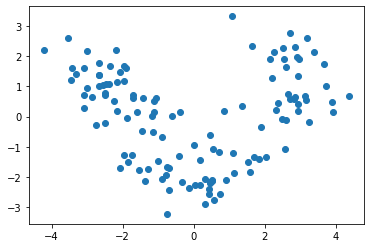

In [67]:
plt.scatter( 'PC 1', 'PC 2', data=X_train_pca);

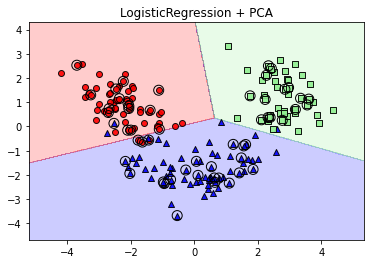

In [81]:
from sklearn.decomposition import PCA
from plot_decision_regions import plot_decision_regions

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca  = pca.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)
X_combo = np.vstack((X_train_pca, X_test_pca))
y_combo = np.hstack((y_train, y_test))
plot_decision_regions(X_combo, y_combo, classifier=lr, test_idx=range(len(X_train_std),len(X_combo)))
plt.title('LogisticRegression + PCA');

# Линейный дискриминантный анализ [LDA]

*матрица рассеяния* **внутри** классов на основе векторов из средних<br>$ S_w = \sum{S_i}$<br>
$ S_i = \sum{(x-m_i)(x-m_i)^T}$<br>
-- Ковариационная матрица это нормализованная версия матрицы рассеияния

*матрица рассеяния* **между** классов<br>$ S_b =  \sum{n_i(m_i- m)(m_i - m)^T}$


1. стандартизировать данные
2. вычислить d-мерные вектор средних для каждого класса
3. построить *матрицу рассеяния* dxd 1) между классами 2) внутри классов
4. $S^{-1}_wS_b$  разложить на вектора и значения
5. отсортировать значения (для ранжирования векторов) 
6. Выбрать k векторов, соответствующих k наибольшим значениям `dxk`
7. проецируем `dxk`-матрицу на `dxd`-матрицу


In [69]:
mean_vectors = []
for label in range(1, 4):
    mean_vectors.append(np.mean(X_train_std[y_train == label], axis=0))

In [70]:
d = 13
S_w = np.zeros((d, d))
for label, mean_vector in zip(range(1, 4), mean_vectors):
    S_i = np.zeros((d, d))
    for class_i in X_train_std[y_train == label]:
        x, m_i = class_i.reshape(d, 1), mean_vector.reshape(d, 1)
        S_i += (x-m_i)@((x-m_i).T)
    S_w += S_i    

In [71]:
d = 13
general_mean =  X_train_std.mean(axis=0).reshape(d, 1)
S_b = np.zeros((d, d))
for label, mean_vector in zip(range(1, 4), mean_vectors):
    n = X_train_std[y_train == label].shape[0]
    m_i =  mean_vector.reshape(d, 1)
    S_b += n*( (general_mean-m_i) @ ((general_mean-m_i).T))

In [72]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_w)@S_b)

In [73]:
eigen_pairs = [(abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

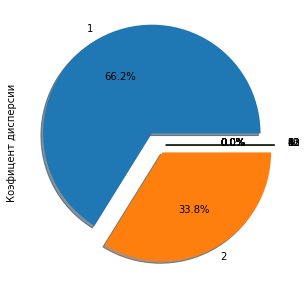

In [74]:
var_exp = [abs(i) / sum(eigen_vals) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = pd.DataFrame({'features':range(13), 'Коэфицент дисперсии' :  var_exp})
cum_var_exp.plot.pie(explode=[0.1]*13,labels = range(1,14),
                     y = 'Коэфицент дисперсии',autopct='%1.1f%%',
                     shadow=True,legend=False,figsize=(5, 5));

График показывает, что первые 2 значения объясняют 100% дисперсии в данных

## - матрица проекции из k векторов

In [75]:
vectors = [eigen_pairs[0][1], eigen_pairs[1][1]]
mask_matrix = pd.DataFrame(np.array(vectors).T, columns=['LD 1','LD 2'])

In [76]:
X_train_lda = X_train_std @ mask_matrix

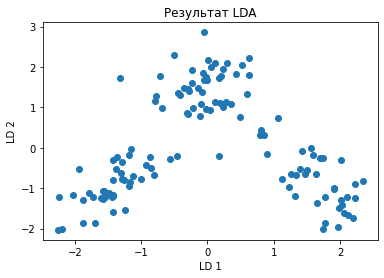

In [77]:
plt.scatter('LD 1', 'LD 2', data=X_train_lda)
plt.title('Результат LDA')
plt.xlabel('LD 1')
plt.ylabel('LD 2');

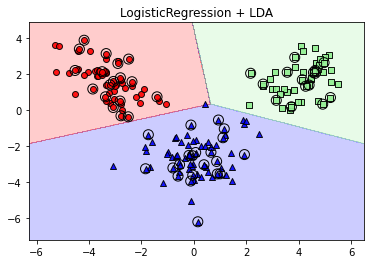

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from plot_decision_regions import plot_decision_regions

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda  = lda.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

X_combo = np.vstack((X_train_lda, X_test_lda))
y_combo = np.hstack((y_train, y_test))
plot_decision_regions(X_combo, y_combo, classifier=lr, test_idx=range(len(X_train_std),len(X_combo)))
plt.title('LogisticRegression + LDA');

NameError: name 'x1' is not defined

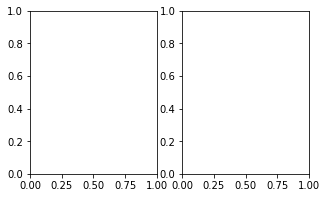

In [79]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))

axes[0].plot(x1, y1)
axes[1].plot(x2, y2)

fig.tight_layout()